In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project3: Classification/Mobile Prediction/data_mobile_price_range.csv')

In [ ]:
df = df.rename(columns={'battery_power':'battery_power(mAh)','blue':'bluetooth','clock_speed':'clock_speed(GHz)','fc':'front_camera(MP)','four_g':'4G','int_memory':'int_memory(GB)','m_dep':'mob_dep(cm)','n_cores':'core_proc','pc':'rear_camera(MP)','sc_h':'screen_height(cm)','sc_w':'screen_width(cm)','talk_time':'talk_time(battery)','three_g':'3G'})

In [ ]:
df

,battery_power(mAh),bluetooth,clock_speed(GHz),dual_sim,front_camera(MP),4G,int_memory(GB),mob_dep(cm),mobile_wt,core_proc,rear_camera(MP),px_height,px_width,ram,screen_height(cm),screen_width(cm),talk_time(battery),3G,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
df.columns

Index(['battery_power(mAh)', 'bluetooth', 'clock_speed(GHz)', 'dual_sim',
       'front_camera(MP)', '4G', 'int_memory(GB)', 'mob_dep(cm)', 'mobile_wt',
       'core_proc', 'rear_camera(MP)', 'px_height', 'px_width', 'ram',
       'screen_height(cm)', 'screen_width(cm)', 'talk_time(battery)', '3G',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.info()  # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_power(mAh)  2000 non-null   int64  
 1   bluetooth           2000 non-null   int64  
 2   clock_speed(GHz)    2000 non-null   float64
 3   dual_sim            2000 non-null   int64  
 4   front_camera(MP)    2000 non-null   int64  
 5   4G                  2000 non-null   int64  
 6   int_memory(GB)      2000 non-null   int64  
 7   mob_dep(cm)         2000 non-null   float64
 8   mobile_wt           2000 non-null   int64  
 9   core_proc           2000 non-null   int64  
 10  rear_camera(MP)     2000 non-null   int64  
 11  px_height           2000 non-null   int64  
 12  px_width            2000 non-null   int64  
 13  ram                 2000 non-null   int64  
 14  screen_height(cm)   2000 non-null   int64  
 15  screen_width(cm)    2000 non-null   int64  
 16  talk_t

#### No null value

In [ ]:
df_corr = df.corr()
imp = df_corr[20:21]
imp

,battery_power(mAh),bluetooth,clock_speed(GHz),dual_sim,front_camera(MP),4G,int_memory(GB),mob_dep(cm),mobile_wt,core_proc,rear_camera(MP),px_height,px_width,ram,screen_height(cm),screen_width(cm),talk_time(battery),3G,touch_screen,wifi,price_range
price_range,0.200723,0.020573,-0.006606,0.017444,0.021998,0.014772,0.044435,0.000853,-0.030302,0.004399,0.033599,0.148858,0.165818,0.917046,0.022986,0.038711,0.021859,0.023611,-0.030411,0.018785,1.0


In [ ]:
df['wifi'].unique()

array([1, 0])

In [ ]:
#list(df.columns)
list(df['wifi'].unique()) == [0,1] or list(df['wifi'].unique()) == [1,0]

True

In [ ]:
categorical_columns = []
for elem in list(df.columns):
    if list(df[elem].unique()) == [0,1] or list(df[elem].unique()) == [1,0]:
        categorical_columns.append(elem)

In [ ]:
categorical_columns

['bluetooth', 'dual_sim', '4G', '3G', 'touch_screen', 'wifi']

In [ ]:
numerical_columns = []
for elem in list(df.columns):
    if list(df[elem].unique()) != [0,1] and list(df[elem].unique()) != [1,0]:
        numerical_columns.append(elem)

In [ ]:
numerical_columns

['battery_power(mAh)',
 'clock_speed(GHz)',
 'front_camera(MP)',
 'int_memory(GB)',
 'mob_dep(cm)',
 'mobile_wt',
 'core_proc',
 'rear_camera(MP)',
 'px_height',
 'px_width',
 'ram',
 'screen_height(cm)',
 'screen_width(cm)',
 'talk_time(battery)',
 'price_range']

### Univariate Analysis:

In [ ]:
# Categorical Columns:
for elem in categorical_columns:
    print(f'Percentage of phone with or without {elem}')
    print(df[elem].value_counts()/len(df[elem])*100)

Percentage of phone with or without bluetooth
0    50.5
1    49.5
Name: bluetooth, dtype: float64
Percentage of phone with or without dual_sim
1    50.95
0    49.05
Name: dual_sim, dtype: float64
Percentage of phone with or without 4G
1    52.15
0    47.85
Name: 4G, dtype: float64
Percentage of phone with or without 3G
1    76.15
0    23.85
Name: 3G, dtype: float64
Percentage of phone with or without touch_screen
1    50.3
0    49.7
Name: touch_screen, dtype: float64
Percentage of phone with or without wifi
1    50.7
0    49.3
Name: wifi, dtype: float64


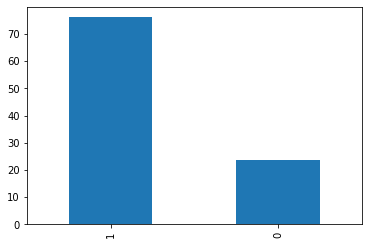

In [ ]:
(df['3G'].value_counts()/len(df['3G'])*100).plot.bar()

In [ ]:
# Numerical Columns
df[numerical_columns].describe()

,battery_power(mAh),clock_speed(GHz),front_camera(MP),int_memory(GB),mob_dep(cm),mobile_wt,core_proc,rear_camera(MP),px_height,px_width,ram,screen_height(cm),screen_width(cm),talk_time(battery),price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


#### No outlier

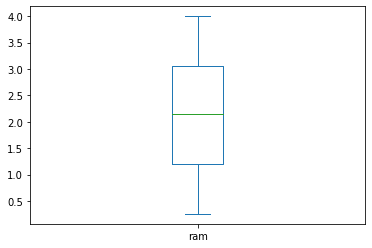

In [ ]:
(df['ram']/1000).plot.box() # ram has highest correlation with price range

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


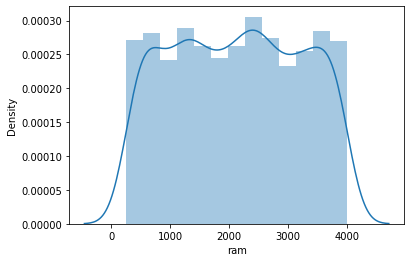

In [ ]:
sns.distplot(df["ram"])

### Bivariate Analysis

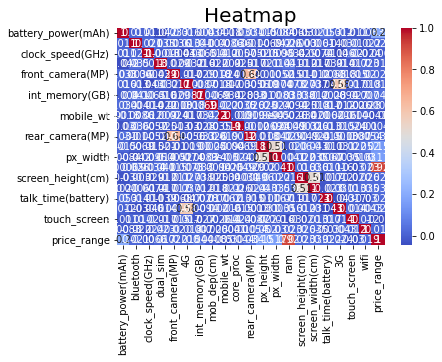

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap', fontsize=20)
plt.rcParams['figure.figsize'] = (20, 20)
plt.show()

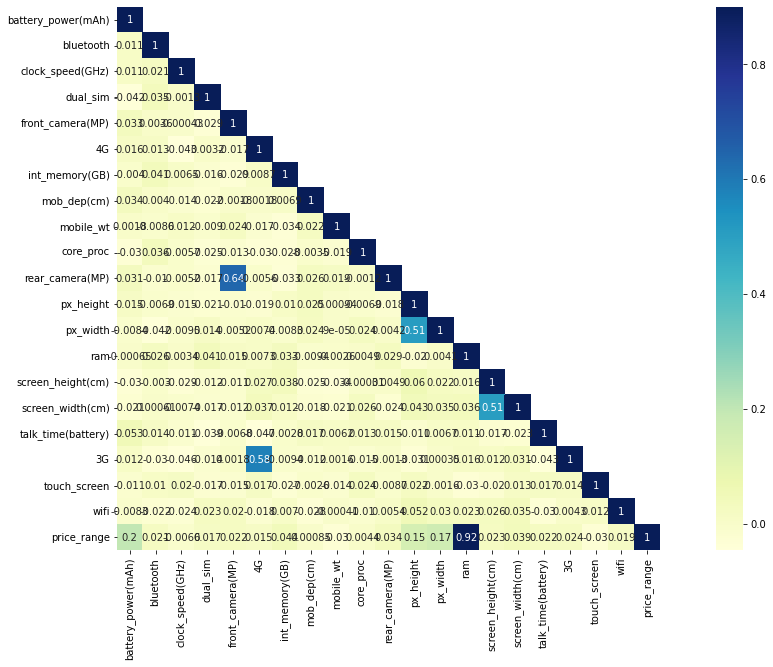

In [ ]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

# Notes:
Independent variables with high correlation:
1. rear_camera(MP) with front_camera(MP)
2. 3G with 4G
3. px_width with px_height
4. screen_height(cm) with screen_width(cm)

Dependent correlation with independent with high values:
1. ram(0.92)
2. px_width(0.17) and px_height(0.15)
3. battery_power(mAh)(0.2)

In [ ]:
df['screen_size(inch)'] = np.sqrt((df['screen_height(cm)'])**2 + (df['screen_width(cm)'])**2)*0.393 

In [ ]:
df.drop(['screen_height(cm)','screen_width(cm)'], axis=1, inplace=True)

In [ ]:
categorical_columns

['bluetooth', 'dual_sim', '4G', '3G', 'touch_screen', 'wifi']

In [ ]:
# Bivariate analysis for price_range vs categorical columns
print(pd.crosstab(df['bluetooth'],df['price_range']))
print(pd.crosstab(df['dual_sim'],df['price_range']))
print(pd.crosstab(df['4G'],df['price_range']))
print(pd.crosstab(df['3G'],df['price_range']))
print(pd.crosstab(df['touch_screen'],df['price_range']))
print(pd.crosstab(df['wifi'],df['price_range']))

price_range    0    1    2    3
bluetooth                      
0            257  255  257  241
1            243  245  243  259
price_range    0    1    2    3
dual_sim                       
0            250  245  251  235
1            250  255  249  265
price_range    0    1    2    3
4G                             
0            241  238  253  225
1            259  262  247  275
price_range    0    1    2    3
3G                             
0            127  122  113  115
1            373  378  387  385
price_range     0    1    2    3
touch_screen                    
0             238  239  265  252
1             262  261  235  248
price_range    0    1    2    3
wifi                           
0            252  248  248  238
1            248  252  252  262


In [ ]:
numerical_columns

['battery_power(mAh)',
 'clock_speed(GHz)',
 'front_camera(MP)',
 'int_memory(GB)',
 'mob_dep(cm)',
 'mobile_wt',
 'core_proc',
 'rear_camera(MP)',
 'px_height',
 'px_width',
 'ram',
 'screen_height(cm)',
 'screen_width(cm)',
 'talk_time(battery)',
 'price_range']

Text(0, 0.5, 'battery_power(mAh)')

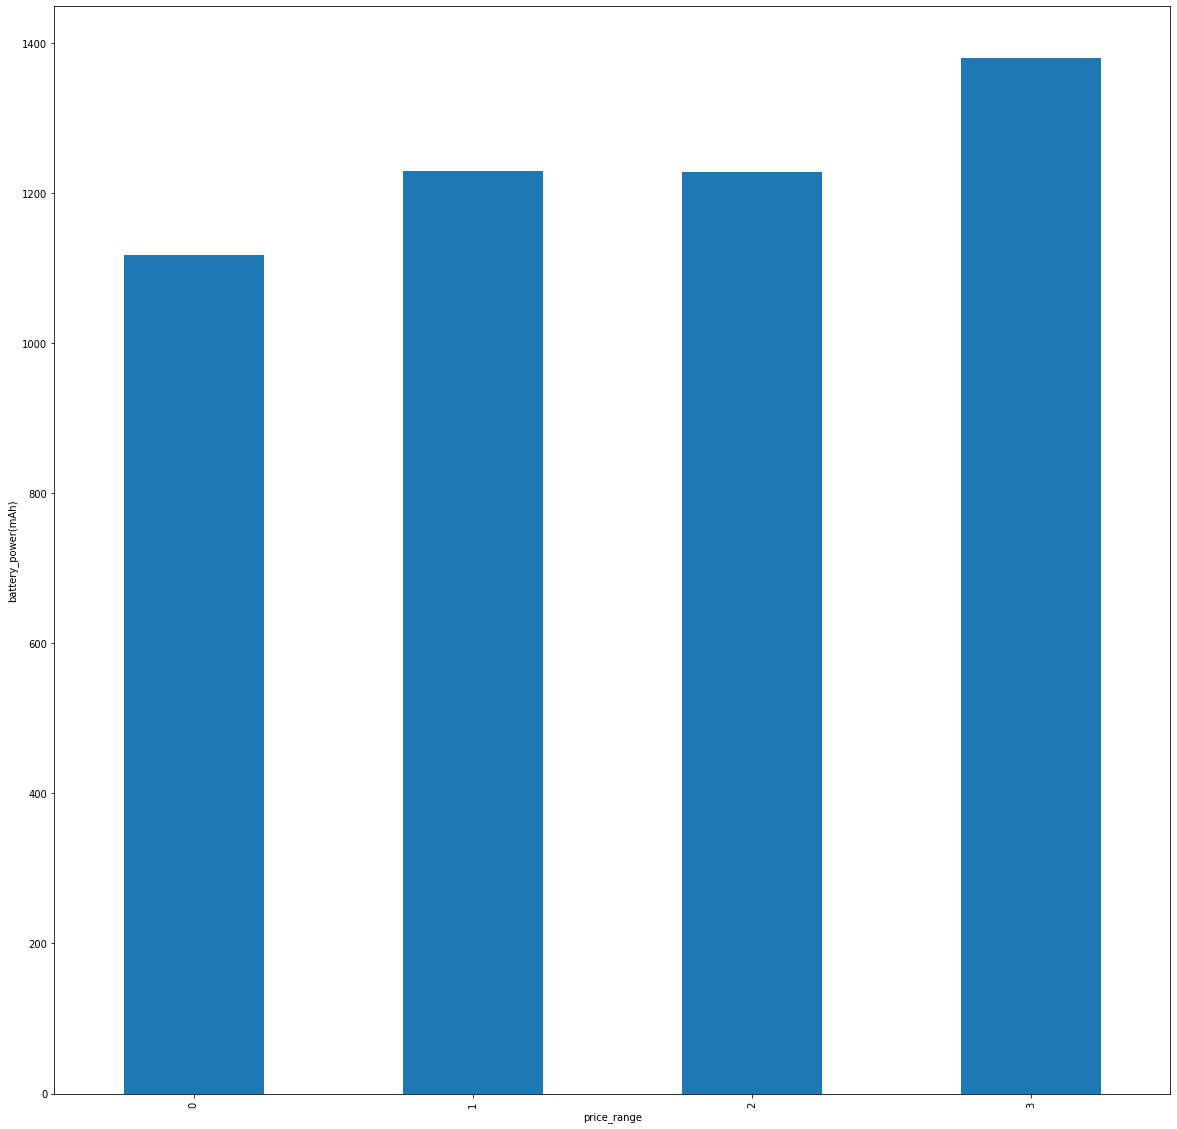

In [ ]:
df.groupby('price_range')['battery_power(mAh)'].mean().plot.bar()
plt.rcParams['figure.figsize'] = (4,4)
plt.ylabel('battery_power(mAh)')

Text(0, 0.5, 'Ram(MB)')

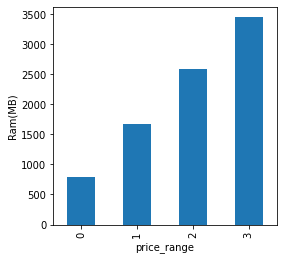

In [ ]:
df.groupby('price_range')['ram'].mean().plot.bar()
plt.rcParams['figure.figsize'] = (4,4)
plt.ylabel('Ram(MB)')

Text(0, 0.5, 'rear_camera(MP)')

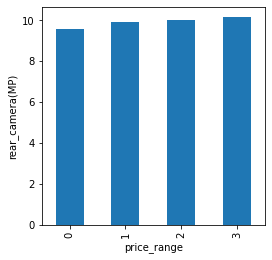

In [ ]:
df.groupby('price_range')['rear_camera(MP)'].mean().plot.bar()
plt.rcParams['figure.figsize'] = (4,4)
plt.ylabel('rear_camera(MP)')